# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mice_nums = len(combined_df["Mouse ID"].unique())
print(mice_nums)

249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df = pd.DataFrame(combined_df.loc[combined_df["Mouse ID"]=="g989",:])
dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [151]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"].isin(dup_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
# Checking the number of mice in the clean DataFrame.
mice_nums = len(clean_df["Mouse ID"].unique())
print(mice_nums)

248


## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
t_mean = clean_df.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
t_median = clean_df.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
t_var = clean_df.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
t_stdev = clean_df.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
t_SEM = clean_df.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
t_sumstat= pd.DataFrame({"Mean Tumor Volume": t_mean, "Median Tumor Volume":t_median, "Tumor Volume Variance":t_var, 
                         "Tumor Volume Std. Dev.":t_stdev, "Tumor Volume Std. Err.":t_SEM })
#t_SEM

t_sumstat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
t_aggsum = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var", "std", "sem"])
t_aggsum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

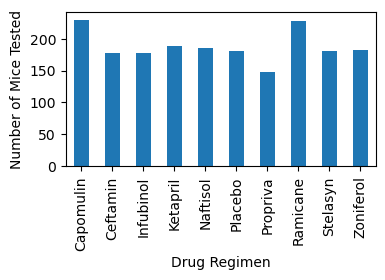

<Figure size 640x480 with 0 Axes>

In [74]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_type = clean_df.groupby("Drug Regimen")
count_drugs = drug_type["Drug Regimen"].count()

bar_panda = count_drugs.plot(kind="bar", figsize=(4,2))
bar_panda.set_xlabel("Drug Regimen")
bar_panda.set_ylabel("Number of Mice Tested")

plt.show()
plt.tight_layout()

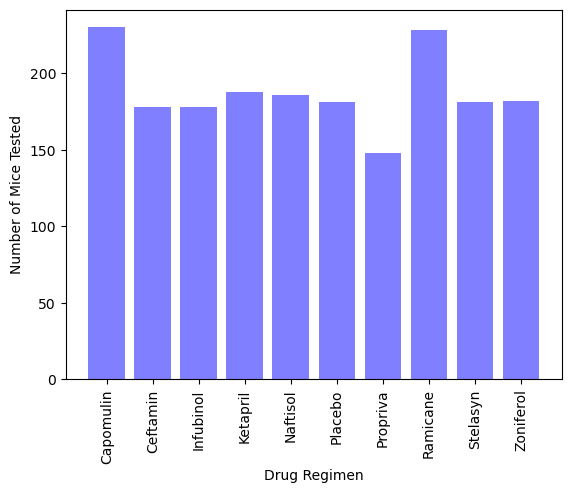

In [102]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
count_drugs
x_axis = count_drugs.index.values
y_axis = count_drugs.values
#tick_locations = [value for value in x_axis]
#plt.figure(figsize=(4,2))
plt.bar(x_axis, y_axis, color="b", alpha=1.0, align="center")
plt.xticks(rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()

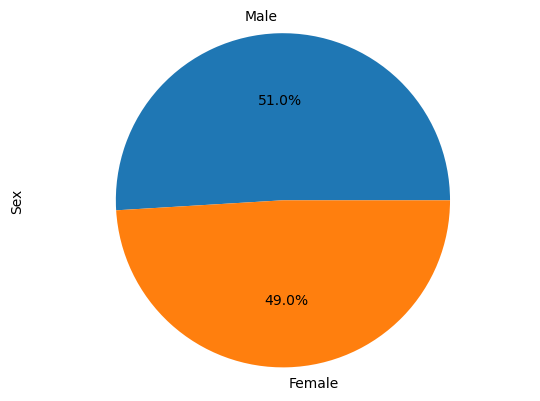

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fvsm_df = clean_df["Sex"].value_counts()

fvsm_pie = fvsm_df.plot(kind="pie", y="Sex", autopct="%1.1f%%")
fvsm_pie.set_ylabel("Sex")

plt.axis("equal")
plt.show()

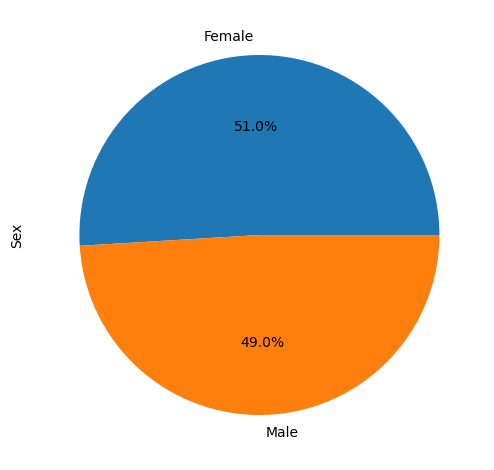

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
plt.pie(fvsm_df, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")

plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [175]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
maximum = clean_df.groupby("Mouse ID").max()["Timepoint"]                 
maximum = maximum.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatmerge_df = maximum.merge(clean_df, on=("Mouse ID","Timepoint"))
greatmerge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [177]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#(for loop use to display IQR & outliers for each treatment group)
for drug in regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_vols = greatmerge_df.loc[greatmerge_df["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    # add subset 
    tumor_vol.append(drug_vols)
    
    quartiles = drug_vols.quantile([.25,.5,.75])
    low_quart = quartiles[.25] 
    up_quart = quartiles[.75]
    IQR = up_quart - low_quart
    low_bound = low_quart - (1.5*IQR)
    up_bound =  up_quart + (1.5*IQR)
    # Determine outliers using upper and lower bounds
    outliers = drug_vols.loc[(drug_vols < low_bound) | (drug_vols > up_bound)]
    print(f"{drug} outliers, {outliers}")
    

Capomulin outliers, Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers, Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers, 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers, Series([], Name: Tumor Volume (mm3), dtype: float64)


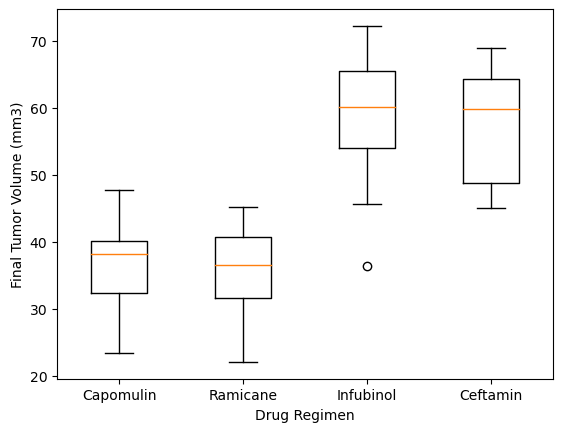

In [182]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#plt.boxplot(arr, showmeans=True)
fig1, bx = plt.subplots()
bx.set_xlabel("Drug Regimen")
bx.set_ylabel("Final Tumor Volume (mm3)")
#bx.set_xticklabels(regimens)
bx.boxplot(tumor_vol, labels=regimens)
plt.show()

## Line and Scatter Plots

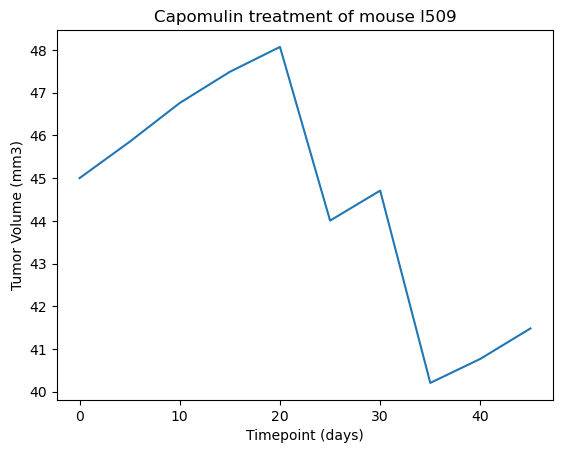

In [183]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Select a single mouse treated with Capomulin, generate a line plot of tumor volume versus time point for that mouse
cap_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]

single_mouse = cap_df.loc[cap_df["Mouse ID"]=="l509",:]

x_axis = single_mouse["Timepoint"]
mouse_vol = single_mouse["Tumor Volume (mm3)"]

fig2, lx2 = plt.subplots()
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, mouse_vol)
plt.show()

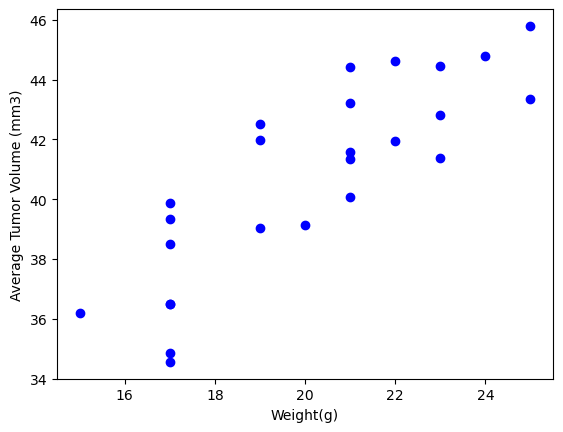

In [188]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin treatment regimen.
avg_tvol = cap_df.groupby(["Mouse ID"]).mean()

fig3, lx3 = plt.subplots()

plt.scatter(avg_tvol["Weight (g)"], avg_tvol["Tumor Volume (mm3)"], marker="o", color="blue")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


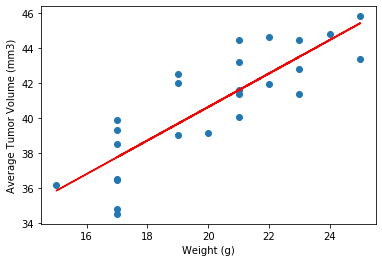

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#####incomplete cell#####
x_axis = avg_tvol["Weight (g)"]
y_axis = avg_tvol["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

fig4, cx = plt.subplots()
plt.scatter(x_axis, y_axis, marker = "o", color="blue")
plt.plot(x_axis, y_axis, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor VOlume (mm3)")

plt.show()